#### Импорт необходимых библиотек

In [2]:
import random

import pandas as pd
pd.options.mode.chained_assignment = None
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

#### Преобработка данных

In [3]:
df = pd.read_csv('pokemon.csv')
col_names = ['number', 'total', 'hp', 'attack', 'defense',
                 'sp_attack', 'sp_defense', 'speed']
for col_name in col_names:
    rows = np.random.randint(0, len(df) - 1, 1)
    for row in rows:
        df[col_name][row] = np.nan
df.isnull().sum()

number          1
name            0
type1           0
type2         498
total           1
hp              1
attack          1
defense         1
sp_attack       1
sp_defense      1
speed           1
generation      0
legendary       0
dtype: int64

In [4]:
df[['name', 'type1', 'type2']] = df[['name', 'type1', 'type2']].astype('category')
df['generation'] = df['generation'].astype('float64')

In [5]:
df.tail()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
1067,896.0,Glastrier,Ice,NaN,580.0,100.0,145.0,130.0,65.0,110.0,30.0,8.0,True
1068,897.0,Spectrier,Ghost,NaN,580.0,100.0,65.0,60.0,145.0,80.0,130.0,8.0,True
1069,898.0,Calyrex,Psychic,Grass,500.0,100.0,80.0,80.0,80.0,80.0,80.0,8.0,True
1070,898.0,Ice Rider Calyrex,Psychic,Ice,680.0,100.0,165.0,150.0,85.0,130.0,50.0,8.0,True
1071,898.0,Shadow Rider Calyrex,Psychic,Ghost,680.0,100.0,85.0,80.0,165.0,100.0,150.0,8.0,True


In [6]:
df.head()

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
0,1.0,Bulbasaur,Grass,Poison,318.0,45.0,49.0,49.0,65.0,65.0,45.0,1.0,False
1,2.0,Ivysaur,Grass,Poison,405.0,60.0,62.0,63.0,80.0,80.0,60.0,1.0,False
2,3.0,Venusaur,Grass,Poison,525.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,False
3,3.0,Mega Venusaur,Grass,Poison,625.0,80.0,100.0,123.0,122.0,120.0,80.0,1.0,False
4,3.0,Gigantamax Venusaur,Grass,Poison,525.0,80.0,82.0,83.0,100.0,100.0,80.0,1.0,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1072 entries, 0 to 1071
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   number      1071 non-null   float64 
 1   name        1072 non-null   category
 2   type1       1072 non-null   category
 3   type2       574 non-null    category
 4   total       1071 non-null   float64 
 5   hp          1071 non-null   float64 
 6   attack      1071 non-null   float64 
 7   defense     1071 non-null   float64 
 8   sp_attack   1071 non-null   float64 
 9   sp_defense  1071 non-null   float64 
 10  speed       1071 non-null   float64 
 11  generation  1072 non-null   float64 
 12  legendary   1072 non-null   bool    
dtypes: bool(1), category(3), float64(9)
memory usage: 122.8 KB


In [8]:
df.describe(include='all')

,number,name,type1,type2,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
count,1071.000000,1072,1072,574,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1072.000000,1072
unique,NaN,1072,20,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,Abomasnow,Water,Flying,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False
freq,NaN,1,136,114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,954
mean,445.007470,NaN,NaN,NaN,440.904762,70.515406,80.925303,74.958917,73.239963,72.483660,68.759104,4.294776,NaN
std,267.808098,NaN,NaN,NaN,121.434103,26.864414,32.475901,31.221132,32.640084,27.946368,30.069947,2.346472,NaN
min,1.000000,NaN,NaN,NaN,175.000000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,0.000000,NaN
25%,209.500000,NaN,NaN,NaN,330.000000,50.000000,56.000000,52.000000,50.000000,50.000000,45.000000,2.000000,NaN
50%,442.000000,NaN,NaN,NaN,461.000000,68.000000,80.000000,70.000000,65.000000,70.000000,65.000000,4.000000,NaN
75%,681.500000,NaN,NaN,NaN,519.500000,84.000000,100.000000,90.000000,95.000000,90.000000,90.000000,6.000000,NaN


#### Выполним поиск признаков, содержащих NaN.

<AxesSubplot:>

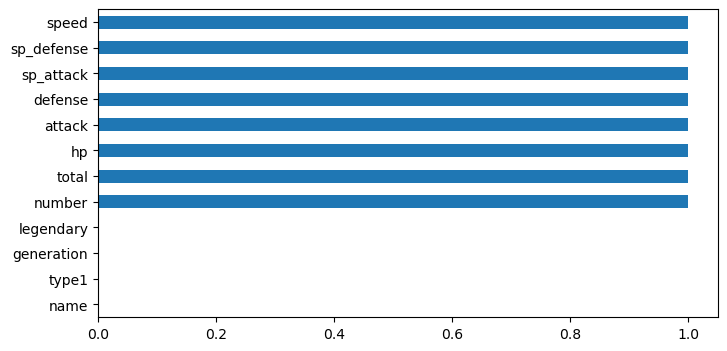

In [9]:
df_wo_type2 = df.drop(['type2'], axis=1)
pd.DataFrame(df_wo_type2.isna().sum(), columns=['NaN count'])\
    .sort_values('NaN count')\
    .plot(kind='barh', legend=False, figsize=(8, 4))

In [10]:
df_wo_type2[df_wo_type2.isna().any(axis=1)]

,number,name,type1,total,hp,attack,defense,sp_attack,sp_defense,speed,generation,legendary
60,43.0,Oddish,Grass,320.0,45.0,50.0,55.0,75.0,NaN,30.0,1.0,False
191,142.0,Mega Aerodactyl,Rock,615.0,80.0,135.0,NaN,70.0,95.0,150.0,1.0,False
212,157.0,Typhlosion,Fire,534.0,78.0,84.0,78.0,NaN,85.0,100.0,2.0,False
502,412.0,Burmy,Bug,224.0,NaN,29.0,45.0,29.0,45.0,36.0,4.0,False
520,428.0,Lopunny,Normal,480.0,65.0,76.0,84.0,54.0,96.0,NaN,4.0,False
792,NaN,Skiddo,Grass,350.0,66.0,65.0,48.0,62.0,57.0,52.0,6.0,False
958,814.0,Raboot,Fire,NaN,65.0,86.0,60.0,55.0,60.0,94.0,8.0,False
966,820.0,Greedent,Normal,460.0,120.0,NaN,95.0,55.0,75.0,20.0,8.0,False


#### Применим методы восстановления значений.

In [11]:
mean_speed = df.speed.mean()
index_speed = np.where(np.isnan(df.speed))
df.speed[index_speed[0]] = mean_speed

In [12]:
sp_def_med = df.sp_defense.median()
index_sp_def = np.where(np.isnan(df.sp_defense))
df.sp_defense[index_sp_def[0]] = sp_def_med

In [13]:
print(df.corr()['sp_attack'])

index_sp_atk = df.index[df.sp_attack.apply(pd.isna)][0]
mean_total, mean_sp_def, mean_sp_atk = df.dropna().total.mean(), df.dropna().sp_defense.mean(), df.dropna().sp_attack.mean()
total_corr, sp_defense_corr = df.corr()['sp_attack'].iloc[1], df.corr()['sp_attack'].iloc[6]

print()
print(f'mean total: {mean_total}, mean sp_defense: {mean_sp_def}, mean sp_attack: {mean_sp_atk}')
print(f'total_sp_attack_corr: {round(total_corr, 2)}, sp_defense_sp_attack_corr: {round(sp_defense_corr, 2)}')

numerator = total_corr * (df.total.iloc[index_sp_atk] - mean_total) + sp_defense_corr * (df.sp_defense.iloc[index_sp_atk] - mean_sp_def)
denominator = abs(total_corr) + abs(sp_defense_corr)

empty_sp_atk = mean_sp_atk + (numerator / denominator)

test_sp_attack = df[['hp', 'attack', 'defense', 'sp_defense', 'speed']].iloc[index_sp_atk]
test_true_value = df.total[index_sp_atk]
for i in test_sp_attack:
    test_true_value -= i
print(f'true result: {test_true_value}')
print(f'result: {empty_sp_atk}')
df.sp_attack[index_sp_atk] = empty_sp_atk

number        0.105776
total         0.726957
hp            0.360168
attack        0.362489
defense       0.219326
sp_attack     1.000000
sp_defense    0.506809
speed         0.437060
generation    0.035273
legendary     0.401142
Name: sp_attack, dtype: float64

mean total: 464.65968586387436, mean sp_defense: 76.6108202443281, mean sp_attack: 78.38394415357766
total_sp_attack_corr: 0.73, sp_defense_sp_attack_corr: 0.51
true result: 109.0
result: 122.68661805010203


In [14]:
index_total = df.index[df.total.apply(pd.isna)][0]
df.total[index_total] = df.loc[index_total, 'hp':'speed'].sum()

In [15]:
index_number = df.index[df.number.apply(pd.isna)][0]

number_before = df.number[index_number - 1]
number_after = df.number[index_number + 1]
if number_after == number_before:
    df.number[index_number] = number_before
if number_after - number_before == 2:
    df.number[index_number] = number_before + 1
if number_after - number_before == 1:
    df.number[index_number] = random.choices([number_before, number_after])

In [16]:
index_def = df.index[df.defense.apply(pd.isna)][0]
df.defense[index_def] = round(df.defense[df['total'] > 680].mean(), 0)

In [17]:
index_atk = df.index[df.attack.apply(pd.isna)][0]
df.attack[index_atk] = df.attack[df['type1'] == 'Bug'].mode()

In [18]:
index_hp = df.index[df.hp.apply(pd.isna)][0]
df.hp[index_hp] = df.loc[:, 'attack':'speed'].iloc[index_hp].mode()[0]

In [19]:
df['type2'] = df['type2'].astype('str')
df['type2'] = df['type2'].replace('nan', 'not have')
df.type2 = df.type2.astype('category')

#### Поиск выбросов

<AxesSubplot:>

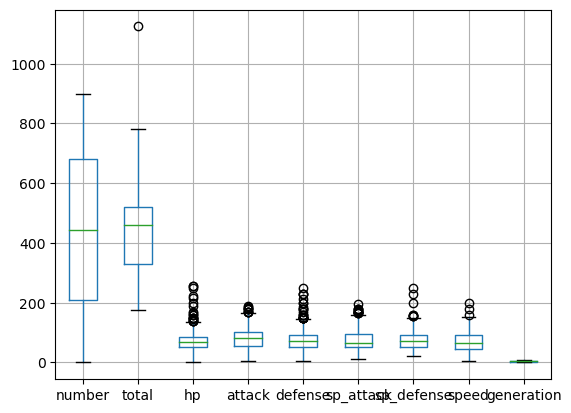

In [20]:
float_cols = [col for col in df.columns if df[col].dtype == 'float64']
df.boxplot(float_cols)

In [21]:
float_cols.remove('number')
float_cols.remove('generation')